In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define paths
train_csv_path = "/Users/ankitsanjyal/Desktop/Projects/Portfolio/AI-REAL-IMAGES-DATA/train.csv"  
train_images_path = "/Users/ankitsanjyal/Desktop/Projects/Portfolio/AI-REAL-IMAGES-DATA/"  

# Load train.csv
df_train = pd.read_csv(train_csv_path)

df_train["image_path"] = df_train["file_name"].apply(lambda x: os.path.join(train_images_path, x))
df_train.head()



,Unnamed: 0,file_name,label,image_path
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1,/Users/ankitsanjyal/Desktop/Projects/Portfolio...
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0,/Users/ankitsanjyal/Desktop/Projects/Portfolio...
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1,/Users/ankitsanjyal/Desktop/Projects/Portfolio...
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0,/Users/ankitsanjyal/Desktop/Projects/Portfolio...
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1,/Users/ankitsanjyal/Desktop/Projects/Portfolio...


In [3]:
df_train.columns

Index(['Unnamed: 0', 'file_name', 'label', 'image_path'], dtype='object')

In [4]:
import os
from skimage.feature import canny

def extract_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None  # Handle missing images

    img = cv2.resize(img, (256, 256))  # Standardize dimensions
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Pixel Intensity Stats
    mean_intensity = np.mean(img_gray)
    median_intensity = np.median(img_gray)
    std_intensity = np.std(img_gray)

    # Edge Density (Canny Edge Detection)
    edges = canny(img_gray, sigma=1)
    edge_density = np.sum(edges) / (img_gray.shape[0] * img_gray.shape[1])

    # Fourier Transform Features
    f_transform = np.fft.fft2(img_gray)
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.abs(f_transform_shifted)

    mean_freq = np.mean(magnitude_spectrum)
    std_freq = np.std(magnitude_spectrum)
    high_freq = np.mean(magnitude_spectrum[128:, 128:])  # Focus on high-freq region

    return [mean_intensity, median_intensity, std_intensity, edge_density, mean_freq, std_freq, high_freq]

# Apply feature extraction
features = []
for img_path in df_train["image_path"]:
    extracted = extract_features(img_path)
    if extracted:
        features.append(extracted)

# Create feature DataFrame
df_features = pd.DataFrame(features, columns=["mean_intensity", "median_intensity", "std_intensity", "edge_density", "mean_freq", "std_freq", "high_freq"])

# Merge with labels
df_train = df_train.reset_index(drop=True)
df_train = df_train.join(df_features)

# Drop rows with missing features (if any)
df_train.dropna(inplace=True)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select relevant features (modify based on available features in df_train)
feature_cols = [
    "mean_intensity", "median_intensity", "std_intensity",  
    "edge_density", "mean_freq", "std_freq", "high_freq"
]

X = df_train[feature_cols].values  # Feature matrix
y = df_train["label"].values       # Target labels (0 = Real, 1 = AI)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (SVM is sensitive to scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize and train SVM
svm_model = SVC(kernel="rbf", C=10, gamma=1, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)


Model Accuracy: 0.8437
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      7995
           1       0.86      0.82      0.84      7995

    accuracy                           0.84     15990
   macro avg       0.84      0.84      0.84     15990
weighted avg       0.84      0.84      0.84     15990



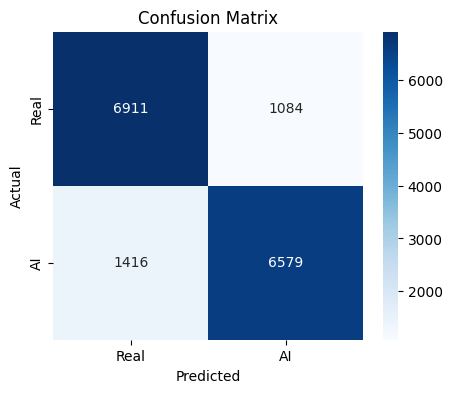

In [29]:

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "AI"], yticklabels=["Real", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize and train SVM
svm_model = SVC(kernel="rbf", C=2.0, gamma=0.5, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)


Model Accuracy: 0.8427
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      7995
           1       0.86      0.82      0.84      7995

    accuracy                           0.84     15990
   macro avg       0.84      0.84      0.84     15990
weighted avg       0.84      0.84      0.84     15990



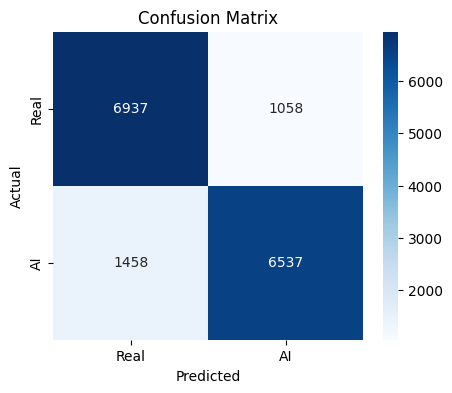

In [11]:

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "AI"], yticklabels=["Real", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
from sklearn.inspection import permutation_importance
feature_names = ["mean_intensity", "median_intensity", "std_intensity", "edge_density", "mean_freq", "std_freq", "high_freq"]

result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

perm_importance = pd.DataFrame({"Feature": feature_names, "Importance": result.importances_mean})
perm_importance = perm_importance.sort_values(by="Importance", ascending=False)

print(perm_importance)


            Feature  Importance
4         mean_freq    0.214547
2     std_intensity    0.145134
3      edge_density    0.060075
1  median_intensity    0.052201
5          std_freq    0.050700
0    mean_intensity    0.045410
6         high_freq    0.035685


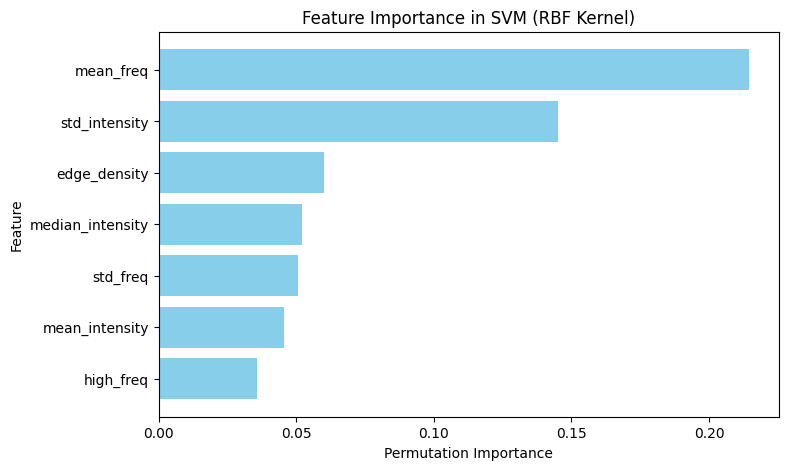

In [12]:

# Plot
plt.figure(figsize=(8, 5))
plt.barh(perm_importance["Feature"], perm_importance["Importance"], color="skyblue")
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in SVM (RBF Kernel)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

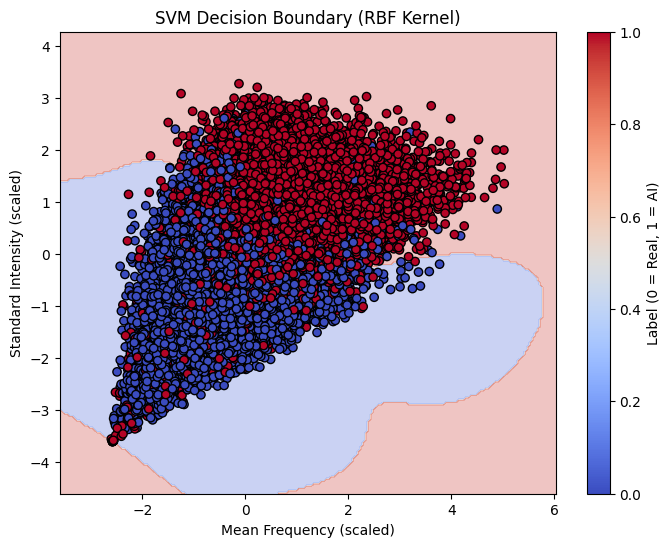

In [13]:
# Select two most important features
X = df_train[['mean_freq', 'std_intensity']].values
y = df_train['label'].values  # Assuming 0 = Real, 1 = AI

# Standardize the features (SVM is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM with RBF kernel on 2D data
svm_model = SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(X_scaled, y)

# Create a mesh grid for visualization
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict labels for each point in the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Mean Frequency (scaled)")
plt.ylabel("Standard Intensity (scaled)")
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.colorbar(label="Label (0 = Real, 1 = AI)")
plt.show()


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time

# Define hyperparameter grid
param_grid = {
    "C": [0.1, 1, 2, 5, 10],   # Try multiple C values
    "gamma": [0.1, 0.5, 1, 5], # Different gamma values
    "kernel": ["rbf"]           # Keeping RBF fixed
}

# Initialize SVM
svm_model = SVC(random_state=42)

# Initialize GridSearchCV with GPU optimization
grid_search = GridSearchCV(
    svm_model, 
    param_grid, 
    cv=5,                # 5-fold cross-validation
    scoring="accuracy",  # Optimize for accuracy
    verbose=2,           # Show progress
    n_jobs=-1            # Use all available cores (better than MPS)
)

# Start timing for performance check
start_time = time.time()

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

# Measure time taken
end_time = time.time()
print(f"Time Taken: {end_time - start_time:.2f} seconds")

# Train best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Print final evaluation
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  27.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  27.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  27.7s
[CV] END .......................C=0.1, gamma=0.5, kernel=rbf; total time=  27.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  27.7s
[CV] END .......................C=0.1, gamma=0.5, kernel=rbf; total time=  27.6s
[CV] END .......................C=0.1, gamma=0.5, kernel=rbf; total time=  27.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  27.8s
[CV] END .......................C=0.1, gamma=0.5, kernel=rbf; total time=  27.5s
[CV] END .......................C=0.1, gamma=0.5, kernel=rbf; total time=  27.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  28.6s
[CV] END .........................C=0.1, gamma=

In [13]:
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [14]:

# Print final evaluation
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Test Accuracy: 0.8437
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      7995
           1       0.86      0.82      0.84      7995

    accuracy                           0.84     15990
   macro avg       0.84      0.84      0.84     15990
weighted avg       0.84      0.84      0.84     15990



In [15]:
y_pred = best_svm.predict(X_train)

# Print final evaluation
print(f"Train Accuracy: {accuracy_score(y_train, y_pred):.4f}")
print(f"Classification Report Training:\n{classification_report(y_train, y_pred)}")


Train Accuracy: 0.8530
Classification Report Training:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     31980
           1       0.87      0.83      0.85     31980

    accuracy                           0.85     63960
   macro avg       0.85      0.85      0.85     63960
weighted avg       0.85      0.85      0.85     63960



Training using top-3

In [17]:
# Select top 3 features based on importance
top_features = ["mean_freq", "std_intensity", "edge_density"]

# Split dataset into train and validation sets
X_train_top3 = df_train[top_features]
y_train = df_train["label"]

X_train, X_val, y_train, y_val = train_test_split(X_train_top3, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Train SVM model
svm_model = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)

# Classification Reports
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))

print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

Training Set Performance:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     31980
           1       0.76      0.74      0.75     31980

    accuracy                           0.75     63960
   macro avg       0.75      0.75      0.75     63960
weighted avg       0.75      0.75      0.75     63960

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      7995
           1       0.76      0.74      0.75      7995

    accuracy                           0.75     15990
   macro avg       0.75      0.75      0.75     15990
weighted avg       0.75      0.75      0.75     15990



More feature extraction from the images

In [ ]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from scipy.fftpack import fft2, fftshift

def extract_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img = cv2.resize(img, (256, 256))  # Resize for consistency
    
    # Entropy (Randomness in pixel distribution)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    img_entropy = entropy(hist + 1e-5)  # Avoid log(0) issue
    
    # GLCM Texture Features (Contrast, Energy, Homogeneity)
    glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    
    # Edge Density Variance (Variance in detected edges)
    edges = cv2.Canny(img, 100, 200)
    edge_density_variance = np.var(edges)
    
    # Fourier Transform Features
    f_transform = np.abs(fftshift(fft2(img)))
    low_freq = np.mean(f_transform[:128, :128])  # Low-frequency region
    high_freq = np.mean(f_transform[128:, 128:])  # High-frequency region
    freq_ratio = low_freq / (high_freq + 1e-5)  # Avoid division by zero
    
    return [img_entropy, contrast, energy, homogeneity, edge_density_variance, freq_ratio]

# Apply feature extraction to all images in df_train
df_features = df_train['image_path'].apply(lambda x: pd.Series(extract_features(x)))

# Assign proper column names
df_features.columns = ['entropy', 'contrast', 'energy', 'homogeneity', 'edge_density_var', 'freq_ratio']

# Concatenate new features with original dataframe
df_train = pd.concat([df_train, df_features], axis=1)

# Save the updated dataset
df_train.to_csv("updated_df_train.csv", index=False)

print("Feature extraction complete! New features added.")


Feature extraction complete! New features added.


Training model on all the statistical features

In [24]:

# Define all features (old + new)
features = [
    'mean_intensity', 'median_intensity', 'std_intensity', 'edge_density', 
    'mean_freq', 'std_freq', 'high_freq',  # Old features
    'entropy', 'contrast', 'energy', 'homogeneity', 'edge_density_var', 'freq_ratio'  # New features
]

# Prepare feature matrix and target labels
X = df_train[features]  
y = df_train['label']  

# Split into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)  
svm_model.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)

# Evaluate performance
print("🔹 Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("🔹 Validation Accuracy:", accuracy_score(y_val, y_val_pred))

print("\n📌 Classification Report (Validation Set):\n")
print(classification_report(y_val, y_val_pred))

🔹 Training Accuracy: 0.8210131332082552
🔹 Validation Accuracy: 0.8230143839899937

📌 Classification Report (Validation Set):

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      7995
           1       0.84      0.79      0.82      7995

    accuracy                           0.82     15990
   macro avg       0.82      0.82      0.82     15990
weighted avg       0.82      0.82      0.82     15990



In [26]:
from sklearn.inspection import permutation_importance
feature_names = [
    'mean_intensity', 'median_intensity', 'std_intensity', 'edge_density', 
    'mean_freq', 'std_freq', 'high_freq',  # Old features
    'entropy', 'contrast', 'energy', 'homogeneity', 'edge_density_var', 'freq_ratio'  # New features
]
result = permutation_importance(svm_model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)

perm_importance = pd.DataFrame({"Feature": feature_names, "Importance": result.importances_mean})
perm_importance = perm_importance.sort_values(by="Importance", ascending=False)

print(perm_importance)


             Feature  Importance
4          mean_freq    0.239906
11  edge_density_var    0.108493
6          high_freq    0.085003
5           std_freq    0.014941
8           contrast    0.008143
2      std_intensity    0.000063
3       edge_density    0.000000
7            entropy    0.000000
9             energy    0.000000
10       homogeneity    0.000000
12        freq_ratio    0.000000
1   median_intensity   -0.000063
0     mean_intensity   -0.000100


In [30]:

# Define all features (old + new)
features = [
    'mean_freq','edge_density_var','high_freq','std_freq',
]

# Prepare feature matrix and target labels
X = df_train[features]  
y = df_train['label']  

# Split into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Standardize features (SVM is sensitive to scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)  
svm_model.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)

# Evaluate performance
print("🔹 Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("🔹 Validation Accuracy:", accuracy_score(y_val, y_val_pred))

print("\n📌 Classification Report (Validation Set):\n")
print(classification_report(y_val, y_val_pred))

🔹 Training Accuracy: 0.8208567854909319
🔹 Validation Accuracy: 0.8228267667292057

📌 Classification Report (Validation Set):

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      7995
           1       0.84      0.79      0.82      7995

    accuracy                           0.82     15990
   macro avg       0.82      0.82      0.82     15990
weighted avg       0.82      0.82      0.82     15990



In [32]:
print("\n📌 Classification Report (Training Set):\n")
print(classification_report(y_train, y_train_pred))


📌 Classification Report (Training Set):

              precision    recall  f1-score   support

           0       0.80      0.85      0.83     31980
           1       0.84      0.79      0.82     31980

    accuracy                           0.82     63960
   macro avg       0.82      0.82      0.82     63960
weighted avg       0.82      0.82      0.82     63960



## RandomForest

Let's try some different models
# Logistic Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a pipeline with polynomial features and logistic regression
log_reg_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, interaction_only=False)),  # Add non-linearity
    ("log_reg", LogisticRegression(solver="lbfgs", C=1.0, max_iter=1000, random_state=42))  # Regularized Logistic Regression
])

# Train the model
log_reg_pipeline.fit(X_train, y_train)

# Predictions on test and training data
y_pred_train = log_reg_pipeline.predict(X_train)
y_pred_test = log_reg_pipeline.predict(X_test)

# Evaluate performance on training set
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

# Evaluate performance on test set
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Training Accuracy: 0.8333802376485303
Training Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84     31980
           1       0.85      0.81      0.83     31980

    accuracy                           0.83     63960
   macro avg       0.83      0.83      0.83     63960
weighted avg       0.83      0.83      0.83     63960

Training Confusion Matrix:
 [[27246  4734]
 [ 5923 26057]]
Test Accuracy: 0.8391494684177611
Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      7995
           1       0.85      0.82      0.84      7995

    accuracy                           0.84     15990
   macro avg       0.84      0.84      0.84     15990
weighted avg       0.84      0.84      0.84     15990

Test Confusion Matrix:
 [[6868 1127]
 [1445 6550]]


/var/folders/wz/r4kjttqd25b0x01c0vl1b7gw0000gn/T/ipykernel_8087/3597734799.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(importances), y=np.array(features), palette="viridis")


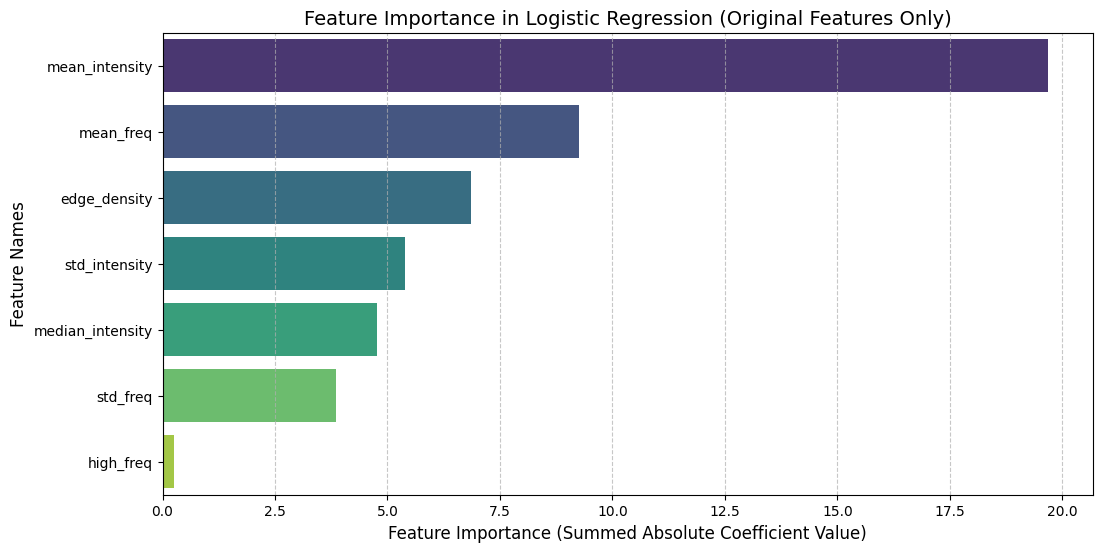

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients
log_reg_coefficients = np.abs(log_reg_pipeline.named_steps["log_reg"].coef_)[0]

# Extract feature names from polynomial features
feature_names = log_reg_pipeline.named_steps["poly_features"].get_feature_names_out(feature_cols)

# Aggregate importance for original features
original_feature_importance = {feature: 0 for feature in feature_cols}

for name, coef in zip(feature_names, log_reg_coefficients):
    base_feature = name.split(" ")[0]  # Extract original feature name before any polynomial terms
    if base_feature in original_feature_importance:
        original_feature_importance[base_feature] += coef  # Sum up contributions

# Convert to sorted list
sorted_features = sorted(original_feature_importance.items(), key=lambda x: x[1], reverse=True)
features, importances = zip(*sorted_features)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=np.array(importances), y=np.array(features), palette="viridis")

plt.xlabel("Feature Importance (Summed Absolute Coefficient Value)", fontsize=12)
plt.ylabel("Feature Names", fontsize=12)
plt.title("Feature Importance in Logistic Regression (Original Features Only)", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


# RANDOM FOREST

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest with tuned hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=150,  # Reduce number of trees slightly
    max_depth=12,  # Reduce depth to prevent overfitting
    min_samples_split=10,  # Require at least 10 samples to split a node
    min_samples_leaf=5,  # Each leaf node should have at least 5 samples
    max_features='sqrt',  # Consider only a subset of features to add randomness
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on test and training data
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate performance on training set
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_rf))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train_rf))

# Evaluate performance on test set
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test_rf))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_rf))


Training Accuracy: 0.8812382739212008
Training Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     31980
           1       0.89      0.87      0.88     31980

    accuracy                           0.88     63960
   macro avg       0.88      0.88      0.88     63960
weighted avg       0.88      0.88      0.88     63960

Training Confusion Matrix:
 [[28642  3338]
 [ 4258 27722]]
Test Accuracy: 0.8538461538461538
Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      7995
           1       0.87      0.84      0.85      7995

    accuracy                           0.85     15990
   macro avg       0.85      0.85      0.85     15990
weighted avg       0.85      0.85      0.85     15990

Test Confusion Matrix:
 [[6976 1019]
 [1318 6677]]


/var/folders/wz/r4kjttqd25b0x01c0vl1b7gw0000gn/T/ipykernel_8087/3011270851.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[sorted_indices], y=np.array(feature_names)[sorted_indices], palette="viridis")


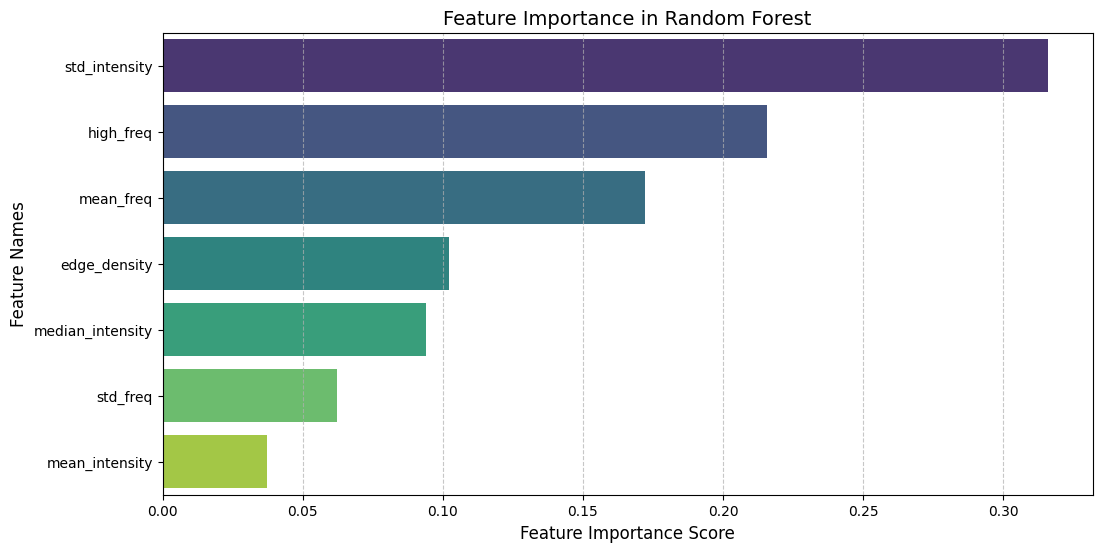

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance values
feature_importance = rf_model.feature_importances_

# Use feature names from feature_cols
feature_names = feature_cols  # Assuming feature_cols is a list of column names

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]  # Descending order

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[sorted_indices], y=np.array(feature_names)[sorted_indices], palette="viridis")

plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature Names", fontsize=12)
plt.title("Feature Importance in Random Forest", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


# Model's Comparision

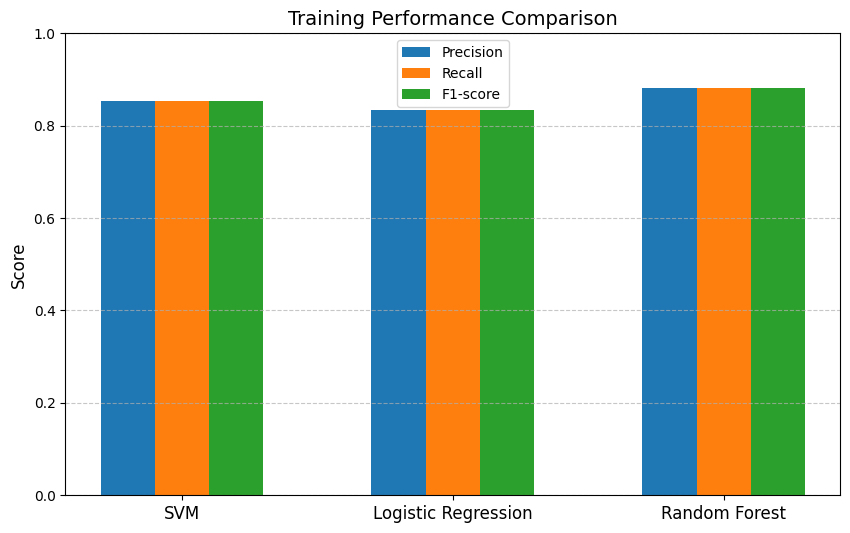

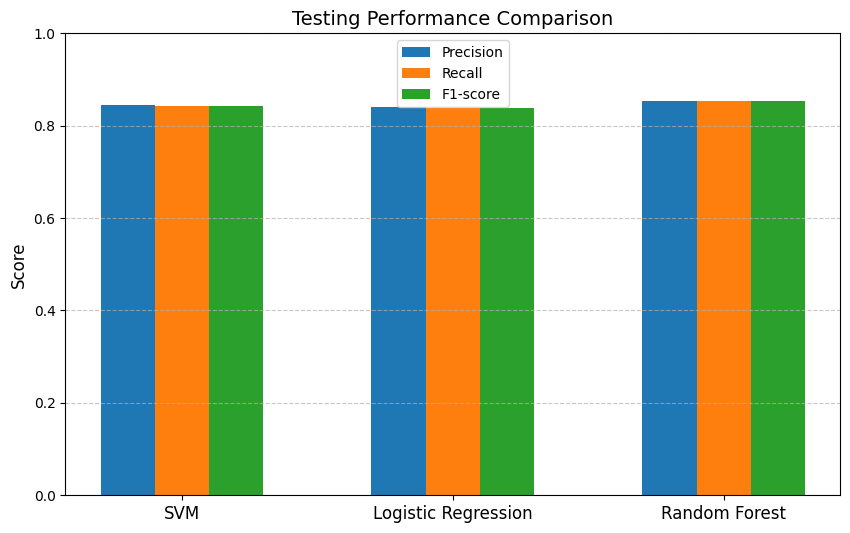

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

# List of models and names
models = {
    "SVM": svm_model,
    "Logistic Regression": log_reg_pipeline,
    "Random Forest": rf_model
}

# Data storage
train_metrics = {}
test_metrics = {}

# Compute metrics for each model
for name, model in models.items():
    # Training predictions
    y_train_pred = model.predict(X_train)
    precision, recall, f1, _ = precision_recall_fscore_support(y_train, y_train_pred, average="macro")
    train_metrics[name] = [precision, recall, f1]

    # Testing predictions
    y_test_pred = model.predict(X_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average="macro")
    test_metrics[name] = [precision, recall, f1]

# Convert to NumPy arrays
train_metrics = np.array(list(train_metrics.values()))
test_metrics = np.array(list(test_metrics.values()))

# Labels for metrics
metrics_labels = ["Precision", "Recall", "F1-score"]

# Plot function
def plot_metrics(metrics, title):
    plt.figure(figsize=(10, 6))
    x = np.arange(len(models))  # Model positions
    width = 0.2  # Bar width

    for i, label in enumerate(metrics_labels):
        plt.bar(x + i * width, metrics[:, i], width=width, label=label)

    plt.xticks(x + width, models.keys(), fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.ylim(0, 1)  # Scores range from 0 to 1
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Plot training metrics
plot_metrics(train_metrics, "Training Performance Comparison")

# Plot testing metrics
plot_metrics(test_metrics, "Testing Performance Comparison")


In [32]:
print(train_metrics)
print(test_metrics)

[[0.8534553  0.85298624 0.85293745]
 [0.83384171 0.83338024 0.83332264]
 [0.88155405 0.88123827 0.8812137 ]]
[[0.8442459  0.84365228 0.84358485]
 [0.83968687 0.83914947 0.83908583]
 [0.85434175 0.85384615 0.85379503]]


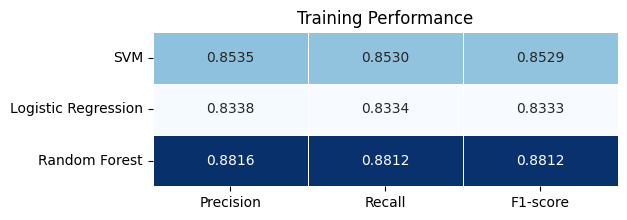

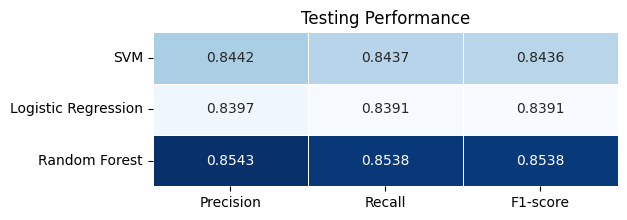

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrames
train_df = pd.DataFrame(train_metrics, columns=["Precision", "Recall", "F1-score"], index=["SVM", "Logistic Regression", "Random Forest"])
test_df = pd.DataFrame(test_metrics, columns=["Precision", "Recall", "F1-score"], index=["SVM", "Logistic Regression", "Random Forest"])

# Function to plot heatmap-style table
def plot_table(df, title):
    plt.figure(figsize=(6, 2))
    sns.heatmap(df, annot=True, cmap="Blues", fmt=".4f", linewidths=0.5, cbar=False)
    plt.title(title, fontsize=12)
    plt.yticks(rotation=0)  # Keep model names readable
    plt.show()

# Plot Training Performance Table
plot_table(train_df, "Training Performance")

# Plot Testing Performance Table
plot_table(test_df, "Testing Performance")


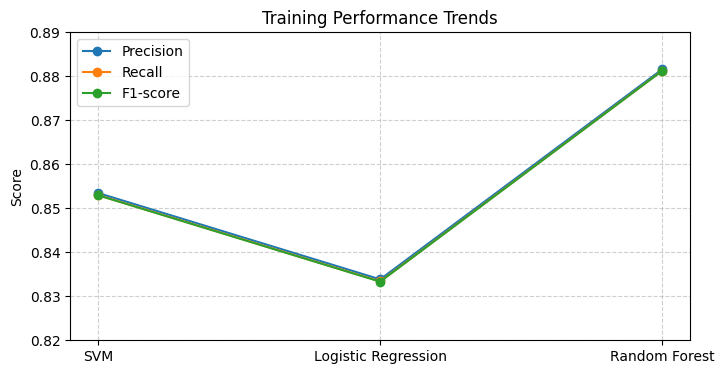

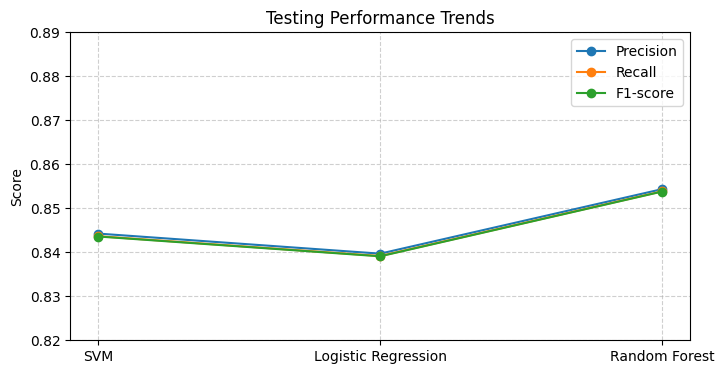

In [34]:
# Plot function
def plot_line_chart(metrics, title):
    plt.figure(figsize=(8, 4))
    
    for i, label in enumerate(metrics_labels):
        plt.plot(models.keys(), metrics[:, i], marker='o', label=label)

    plt.ylabel("Score")
    plt.ylim(0.82, 0.89)  # Adjusting y-axis to highlight differences
    plt.title(title, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Plot training metrics
plot_line_chart(train_metrics, "Training Performance Trends")

# Plot testing metrics
plot_line_chart(test_metrics, "Testing Performance Trends")


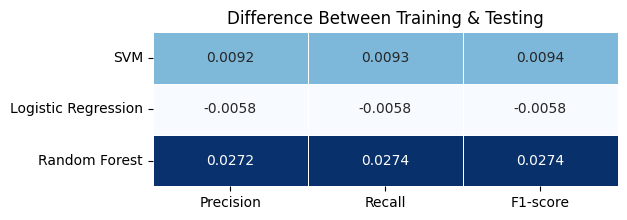

In [35]:
# Calculate differences
diff_metrics = train_metrics - test_metrics

# Create DataFrame
diff_df = pd.DataFrame(diff_metrics, columns=["Precision", "Recall", "F1-score"], index=["SVM", "Logistic Regression", "Random Forest"])

# Plot difference table
plot_table(diff_df, "Difference Between Training & Testing")
